In [2]:
import pandas as pd
from datetime import datetime
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

#Extracting data into pandas Dataframes.
inventory_positions = pd.DataFrame.from_csv("files/InventoryPosition.csv")
products = pd.DataFrame.from_csv("files/Products.csv")
stores = pd.DataFrame.from_csv("files/Stores.csv")


/Users/unstblecrsr/Desktop/invent/venv/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [38]:

#Example variables
product_code = 'Product200' 
store_code = 'Store9'

#Date range for cleaning data.
date_rangee = pd.date_range("2015-01-01", "2017-01-31", freq="D")
#Grabbing product dataframe from inventory_positions.
product_ = inventory_positions.loc[lambda df: df.ProductCode == product_code, :].groupby('Date')['SalesQuantity'].sum()
product_.reindex(date_rangee).fillna(0)
#Grabbing certain store from product dataframe.
product_ = product_.loc['2015-1-1':'2017-1-31']

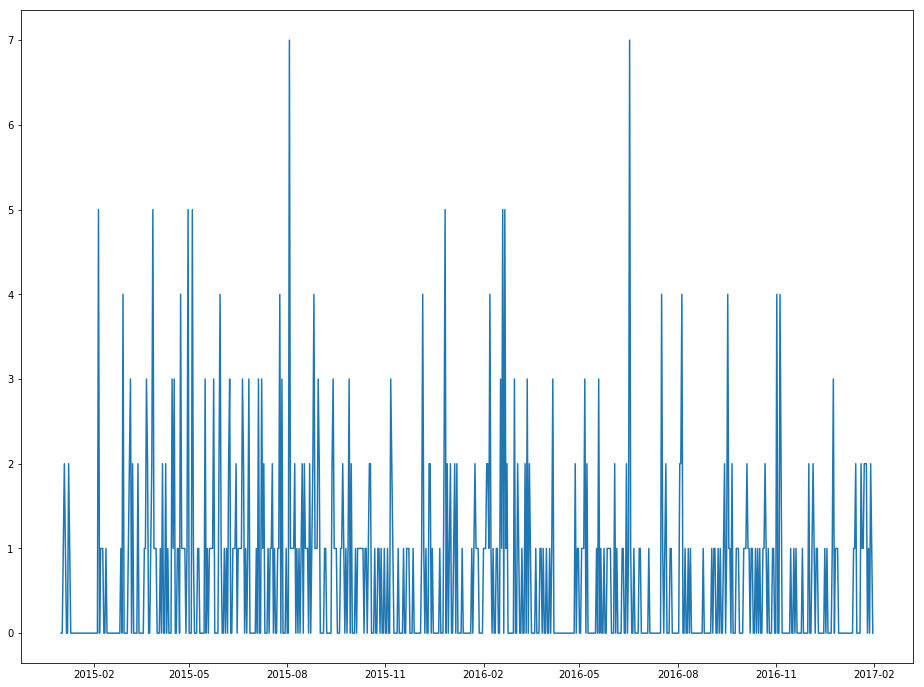

In [39]:
store_ = inventory_positions.loc[lambda df: df.StoreCode == store_code, :]
sproduct_ = store_.loc[lambda df: df.ProductCode == product_code, :]
sproduct_ = sproduct_['SalesQuantity'].reindex(date_rangee).fillna(0)


sproduct_ = sproduct_.loc['2015-1-1':'2017-1-31']
import matplotlib.pyplot as plt

#Showing data for certain store.
plt.plot(sproduct_)
figure = plt.gcf() # get current figure
figure.set_size_inches(16, 12)
plt.show()


#Leveling down the total sales to store sale,
#So we can use it for heuristics.
x = product_
level_factor = x.divide(sproduct_)
level_factor = level_factor.replace([numpy.inf, -numpy.inf], numpy.nan)
level_factor = level_factor.dropna()
average = level_factor.mean()
product_ = product_.divide(25 / average)
#25 is an insigth calculated from iPyton notebook trial and errors.
#25 is the store number, interesting actually...


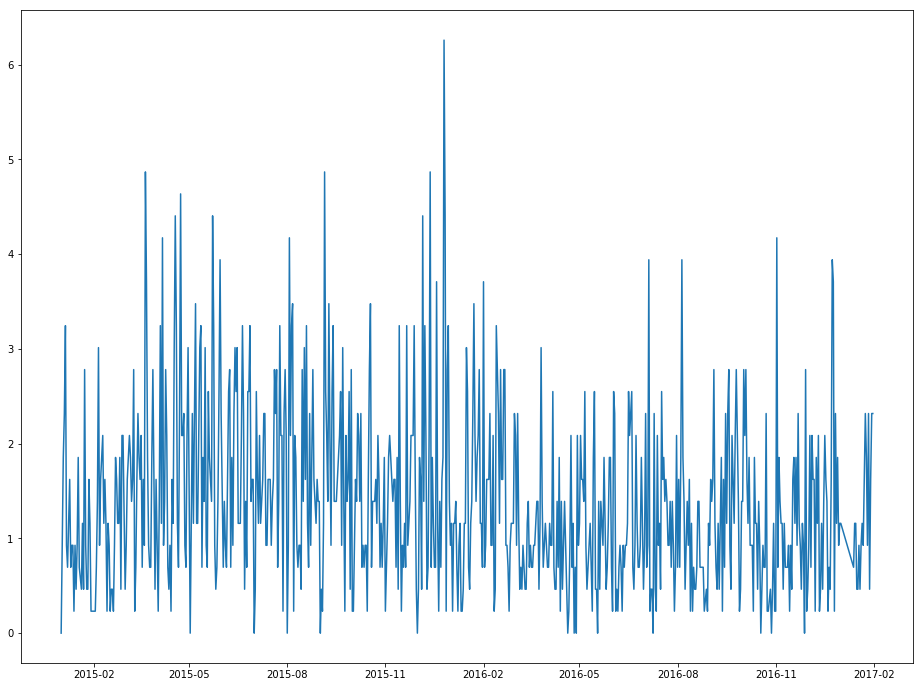

In [40]:

plt.plot(product_)
figure = plt.gcf() # get current figure
figure.set_size_inches(16, 12)
plt.show()

In [41]:
#product_ = product_.astype(int)
#Assingning certain weigths to certain series and adding them up.

res = product_.loc['2015-02-1':'2015-02-14']
res = res.multiply(0.015)
q = product_.loc['2016-02-1':'2016-02-14']
q = q.multiply(0.025)
res = res.add(q , fill_value=0)
q = sproduct_.loc['2015-02-1':'2015-02-14']
q = q.multiply(0.47)
res = res.add(q , fill_value=0)
q = sproduct_.loc['2016-02-1':'2016-02-14']
q = q.multiply(0.49)
res = res.add(q , fill_value=0)

arr = res.values
arr1 = arr[0:len(arr)/2]
arr2 = arr[len(arr)/2:]
prediction = arr1 + arr2 

prediction = prediction.round()
data = sproduct_.loc['2016-02-1':'2016-02-14']
from sklearn.metrics import mean_squared_error
print prediction
print data.values

#Prediction array found, rounding it to minimize root mean square error.
mse = mean_squared_error(data, prediction)
Root_Mean_Square_Error = sqrt(mse)
print Root_Mean_Square_Error

[ 1.  1.  1.  1.  3.  1.  3.  1.  1.  1.  0.  0.  1.  1.]
[ 1.  1.  1.  2.  2.  1.  4.  1.  0.  1.  0.  0.  1.  1.]
0.534522483825
